In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
mdf = pd.read_csv('./mdf.csv')

In [81]:
# movies = pd.read_csv('./movies.csv')
# ratings = pd.read_csv('./ratings.csv')
# # tags = pd.read_csv('./tags.csv')
movies_3 = pd.read_csv('./movies_3.csv')

In [82]:
del movies_3['Unnamed: 0']

## the following is data clearance, no need for implementing

In [ ]:
release = pd.read_csv('./merge_all_3.csv')
release_date = release[['movieId','release_date']]
# release_date.columns=['release_date']
release_date

In [ ]:
movies_2 = ratings.drop('timestamp',axis=1)
movies_2

In [ ]:
movies

In [ ]:
movies_3 =pd.merge(movies,movies_2)
movies_3 = pd.merge(movies_3,release_date)
y = movies_3['release_date'].str.extract(pat='(\d{4})')

In [ ]:
movies_3 = pd.concat([movies_3,y], axis = 1)
movies_3 = movies_3.rename(columns = {0:'year'})
movies_3

In [ ]:
movies_3['genres'].str.split('|')
movies_3

In [ ]:
movies_3.to_csv('movies_3.csv', encoding='utf-8')

## start here

In [83]:
movies_3

,movieId,title,genres,userId,rating,release_date,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1995-11-22,1995.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1995-11-22,1995.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1995-11-22,1995.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1995-11-22,1995.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1995-11-22,1995.0
...,...,...,...,...,...,...,...
25000090,209157,We (2018),Drama,119571,1.5,2018-07-12,2018.0
25000091,209159,Window of the Soul (2001),Documentary,115835,3.0,2004-06-07,2004.0
25000092,209163,Bad Poems (2018),Comedy|Drama,6964,4.5,2018-12-27,2018.0
25000093,209169,A Girl Thing (2001),(no genres listed),119571,3.0,2001-01-20,2001.0


In [85]:
movies_3['year'] = movies_3['year'].fillna(0.0).astype(int)

In [ ]:
del movies_3['movieId']
del movies_3['userId']
del movies_3['release_date']
del movies_3['year']
del movies_3['title']

In [ ]:
movies_3['genres'] = movies_3['genres'].str.split('|', expand = True)
movies_3

In [ ]:
df = pd.merge(movies, ratings)
df

In [ ]:
a = df.drop('genres', axis =1)
b = df.genres.str.get_dummies(sep='|')
mdf = pd.concat([a,b], axis=1)
mdf

In [ ]:
del mdf['movieId']
del mdf['title']
del mdf['userId']
del mdf['timestamp']

In [5]:
# 先groupby moviId
# 先計算一整個column總分除以個數，要注意0不為一個
mdf3 = pd.read_csv('./mdf3.csv')
mdf3

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,3.5,3.5,3.5,3.5,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25000090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25000091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25000092,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25000093,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# mdf3.to_csv('mdf3.csv', index = False)

In [6]:
mdf4 = pd.DataFrame(movies_3['movieId'])
mdf5 = mdf4.merge(mdf3,left_index=True,right_index=True)
mdf5

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0.0,0.0,3.5,3.5,3.5,3.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25000090,209157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25000091,209159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25000092,209163,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25000093,209169,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# 先groupby moviId
# 先計算一整個column總分除以個數，要注意0不為一個
mdf5_n = mdf5.replace({'0':np.nan, 0:np.nan})

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,NaN,NaN,3.5,3.5,3.5,3.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,4.0,4.0,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,3.0,3.0,3.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,4.0,4.0,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,NaN,4.0,4.0,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25000090,209157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25000091,209159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25000092,209163,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25000093,209169,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
for i in col_list:
    z = mdf5_n[i].mean()
    print(z)

3.326379239118188
3.4665917497681593
3.517444633654892
3.614946348438093
3.4325074920278045
3.4239925478057365
3.685043693003225
3.7052805249822454
3.677184674800756
3.5115889157486
3.9257281769386028
3.2935633075659174
3.6037121959523324
3.554715987107105
3.670169244577933
3.5427121571630567
3.4781433928067798
3.5229643285084498
3.7914657875591984
3.5857553061515595


In [58]:
col_list = []
for i in mdf5_n.columns[1:]:
    col_list.append(i)
col_list

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [41]:
mdf6_sum = mdf5.groupby(['movieId']).sum()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,223144.5,223144.5,223144.5,223144.5,0.0,0.0,0.0,223144.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,78778.0,0.0,78778.0,0.0,0.0,0.0,0.0,78778.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,37088.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37088.5,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,7199.5,0.0,0.0,7199.5,0.0,0.0,0.0,0.0,0.0,0.0,7199.5,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,35826.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209163,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
mdf6_avg = mdf5.groupby(['movieId']).mean()
mdf6_avg

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,3.893708,3.893708,3.893708,3.893708,0.0,0.0,0.000000,3.893708,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,3.251527,0.000000,3.251527,0.000000,0.0,0.0,0.000000,3.251527,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.000000,3.142028,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3.142028,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.000000,2.853547,0.0,0.0,2.853547,0.000000,0.0,0.0,0.0,0.0,0.0,2.853547,0.0,0.0,0.0,0.0
5,0.0,0.0,0.000000,0.000000,0.000000,3.058434,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209157,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
209159,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
209163,0.0,0.0,0.000000,0.000000,0.000000,4.500000,0.0,0.0,4.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [50]:
mdf6_sum

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,223144.5,223144.5,223144.5,223144.5,0.0,0.0,0.0,223144.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,78778.0,0.0,78778.0,0.0,0.0,0.0,0.0,78778.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,37088.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37088.5,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,7199.5,0.0,0.0,7199.5,0.0,0.0,0.0,0.0,0.0,0.0,7199.5,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,35826.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209163,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
mdf6_sum_ax1 = pd.DataFrame(mdf6_sum.sum(axis = 0))
# mdf6_sum_ax1 = mdf6_sum_ax1.piovt

,0
(no genres listed),88571.5
Action,25815424.5
Adventure,20515228.5
Animation,5895930.5
Children,7291531.5
Comedy,30563345.0
Crime,15441287.5
Documentary,1194764.0
Drama,40312361.5
Fantasy,9943362.5


In [20]:
mdf6_count = mdf5_n.groupby(['movieId']).count()
mdf6_count

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,57309,57309,57309,57309,0,0,0,57309,0,0,0,0,0,0,0,0,0,0
2,0,0,24228,0,24228,0,0,0,0,24228,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,11804,0,0,0,0,0,0,0,0,0,11804,0,0,0,0
4,0,0,0,0,0,2523,0,0,2523,0,0,0,0,0,0,2523,0,0,0,0
5,0,0,0,0,0,11714,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209157,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
209159,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
209163,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [49]:
mdf6_count_col = mdf6_count.sum(axis=0)
mdf6_count_col = pd.DataFrame(mdf6_count_col)
mdf6_count_col

,0
(no genres listed),26627
Action,7446918
Adventure,5832424
Animation,1630987
Children,2124258
Comedy,8926230
Crime,4190259
Documentary,322449
Drama,10962833
Fantasy,2831585


In [ ]:
mdf6_sum_ax1/mdf6_count_col

In [36]:
mdf6_avg = mdf6_sum/mdf6_count
mdf6_avg

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,3.893708,3.893708,3.893708,3.893708,NaN,NaN,NaN,3.893708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3.251527,NaN,3.251527,NaN,NaN,NaN,NaN,3.251527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,3.142028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.142028,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,2.853547,NaN,NaN,2.853547,NaN,NaN,NaN,NaN,NaN,NaN,2.853547,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,3.058434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209163,NaN,NaN,NaN,NaN,NaN,4.500000,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
mdf6_avg1 = mdf6_avg.fillna(0)
mdf6_avg1

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,3.893708,3.893708,3.893708,3.893708,0,0,0,3.893708,0,0,0,0,0,0,0,0,0,0
2,0,0,3.251527,0,3.251527,0,0,0,0,3.251527,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,3.142028,0,0,0,0,0,0,0,0,0,3.142028,0,0,0,0
4,0,0,0,0,0,2.853547,0,0,2.853547,0,0,0,0,0,0,2.853547,0,0,0,0
5,0,0,0,0,0,3.058434,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209157,0,0,0,0,0,0,0,0,1.5,0,0,0,0,0,0,0,0,0,0,0
209159,0,0,0,0,0,0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0
209163,0,0,0,0,0,4.5,0,0,4.5,0,0,0,0,0,0,0,0,0,0,0


In [64]:
# mdf6_avg.to_csv('mdf6_avg.csv', index = False)
mdf6_avg1

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,3.893708,3.893708,3.893708,3.893708,0,0,0,3.893708,0,0,0,0,0,0,0,0,0,0
2,0,0,3.251527,0,3.251527,0,0,0,0,3.251527,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,3.142028,0,0,0,0,0,0,0,0,0,3.142028,0,0,0,0
4,0,0,0,0,0,2.853547,0,0,2.853547,0,0,0,0,0,0,2.853547,0,0,0,0
5,0,0,0,0,0,3.058434,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209157,0,0,0,0,0,0,0,0,1.5,0,0,0,0,0,0,0,0,0,0,0
209159,0,0,0,0,0,0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0
209163,0,0,0,0,0,4.5,0,0,4.5,0,0,0,0,0,0,0,0,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

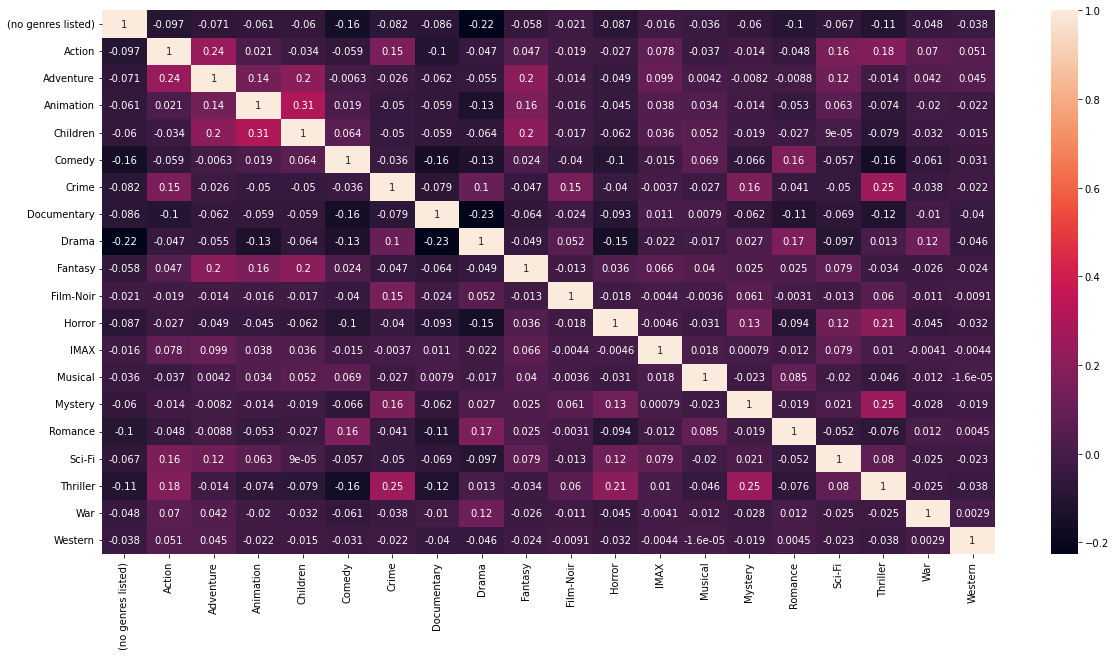

In [72]:
corr2 = mdf6_avg.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corr2,annot= True)
plt.show